# PROYECTO DE ANALISIS DE REGRESION 

- En este proyecto práctico, entrenaremos un modelo de Regresión Lineal para predecir la esperanza de vida.
- Estos datos se obtuvieron inicialmente de la Organización Mundial de la Salud (OMS) y del sitio web de las Naciones Unidas. Los datos contienen características como el año, el estado, la esperanza de vida, la mortalidad adulta, las muertes infantiles, el porcentaje de gasto, el alcohol, etc.

In [28]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# EDA (Exploratory Data Analysis)

In [2]:
# Cargamos los datos
lifeExpectancyDf = pd.read_csv('Life_Expectancy_Data.csv')
lifeExpectancyDf

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0        0.01               71.279624         65.0      1154   19.1  ...   
1        0.01               73.523582         62.0       492   18.6  ...   
2        0.01               73.219243         64.0       430   18.1  ...   
3        0.01               78.184215         67.0      2787   17.6  ...   
4        0.01                7.097109         68.0      3013   17.2  ...   
...       ...                     ...          ...       ...    ...  ...   
2933     4.36                0.000000         68.0        31   27.1  ...   
2934     4.06                0.000000          7.0       998   26.7  ...   
2935     4.43                0.000000         73.0       304   26.3  ...   
2936     1.72                0.000000         76.0       529   25.9  ...   
2937     1.68                0.000000         79.0      1483   25.5  ...   

      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0       6.0               8.16         65.0        0.1  584.259210   
1      58.0               8.18         62.0        0.1  612.696514   
2      62.0               8.13         64.0        0.1  631.744976   
3      67.0               8.52         67.0        0.1  669.959000   
4      68.0               7.87         68.0        0.1   63.537231   
...     ...                ...          ...        ...         ...   
2933   67.0               7.13         65.0       33.6  454.366654   
2934    7.0               6.52         68.0       36.7  453.351155   
2935   73.0               6.53         71.0       39.8   57.348340   
2936   76.0               6.16         75.0       42.1  548.587312   
2937   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937     

In [3]:
# Verificamos si existen datos nulos
lifeExpectancyDf.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<Axes: >

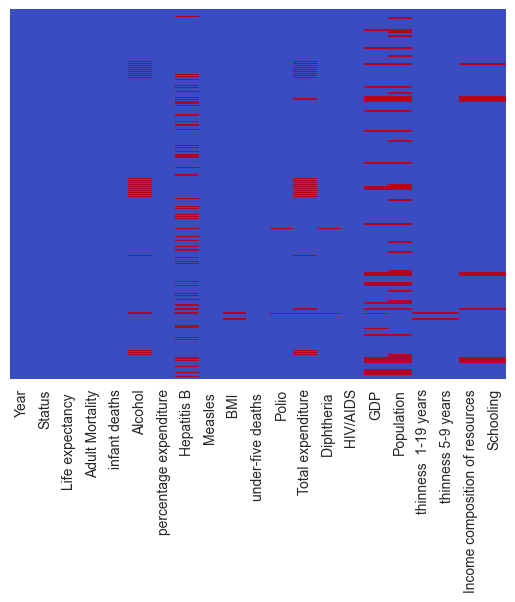

In [4]:
# Visualizamos los datos fatantes con un mapa de calor
sns.heatmap(lifeExpectancyDf.isnull(), yticklabels = False, cbar = False, cmap='coolwarm')

In [5]:
# Revisamos la información de los datos
lifeExpectancyDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [6]:
# Revisamos la estadistica de los datos
lifeExpectancyDf.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

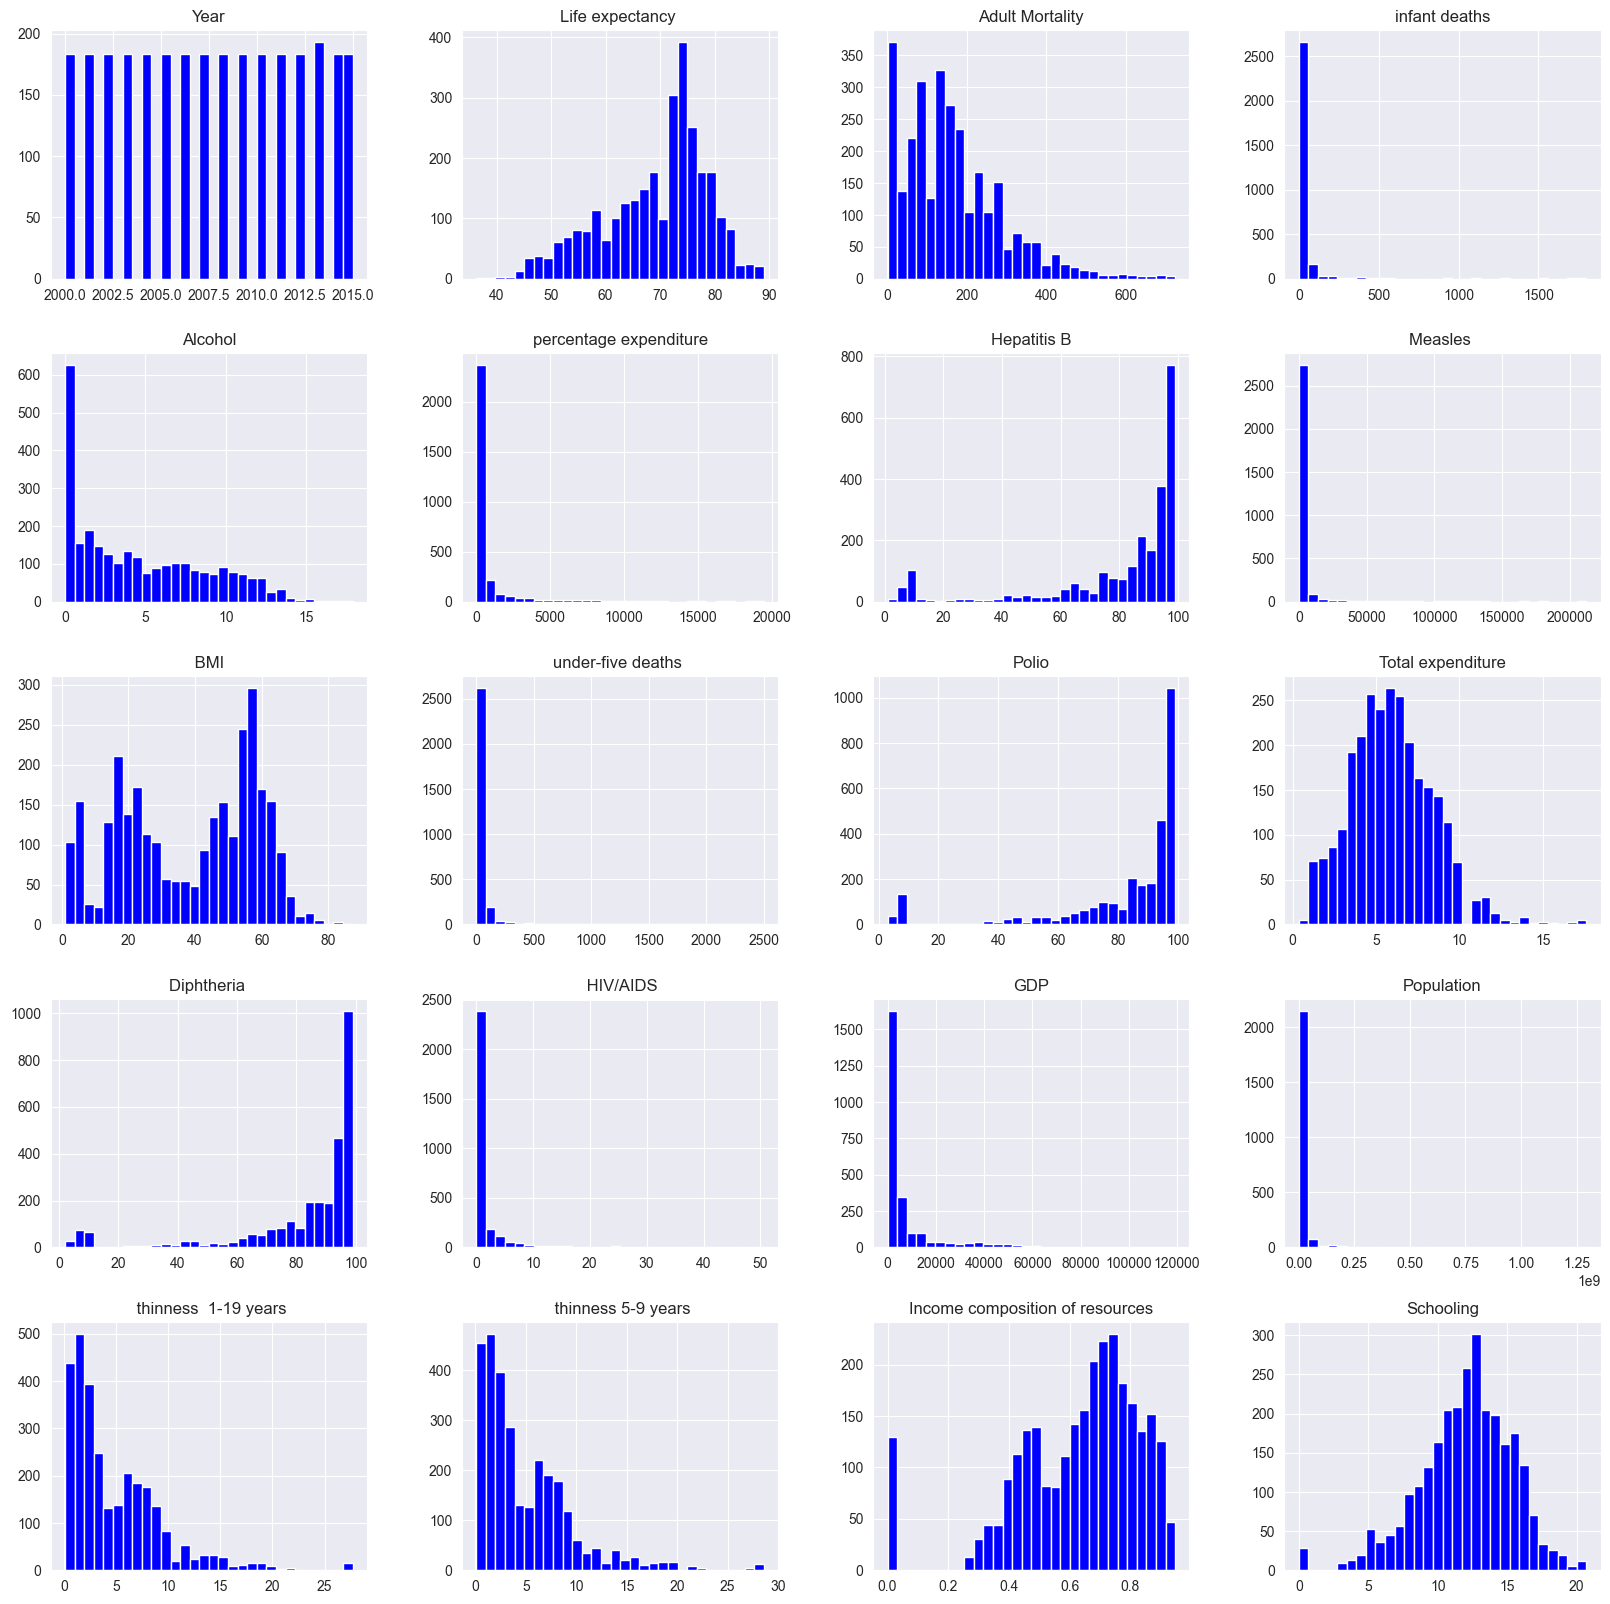

In [7]:
# Graficamos histogramas de las variables
lifeExpectancyDf.hist(bins=30, figsize=(20,20), color='b')

C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


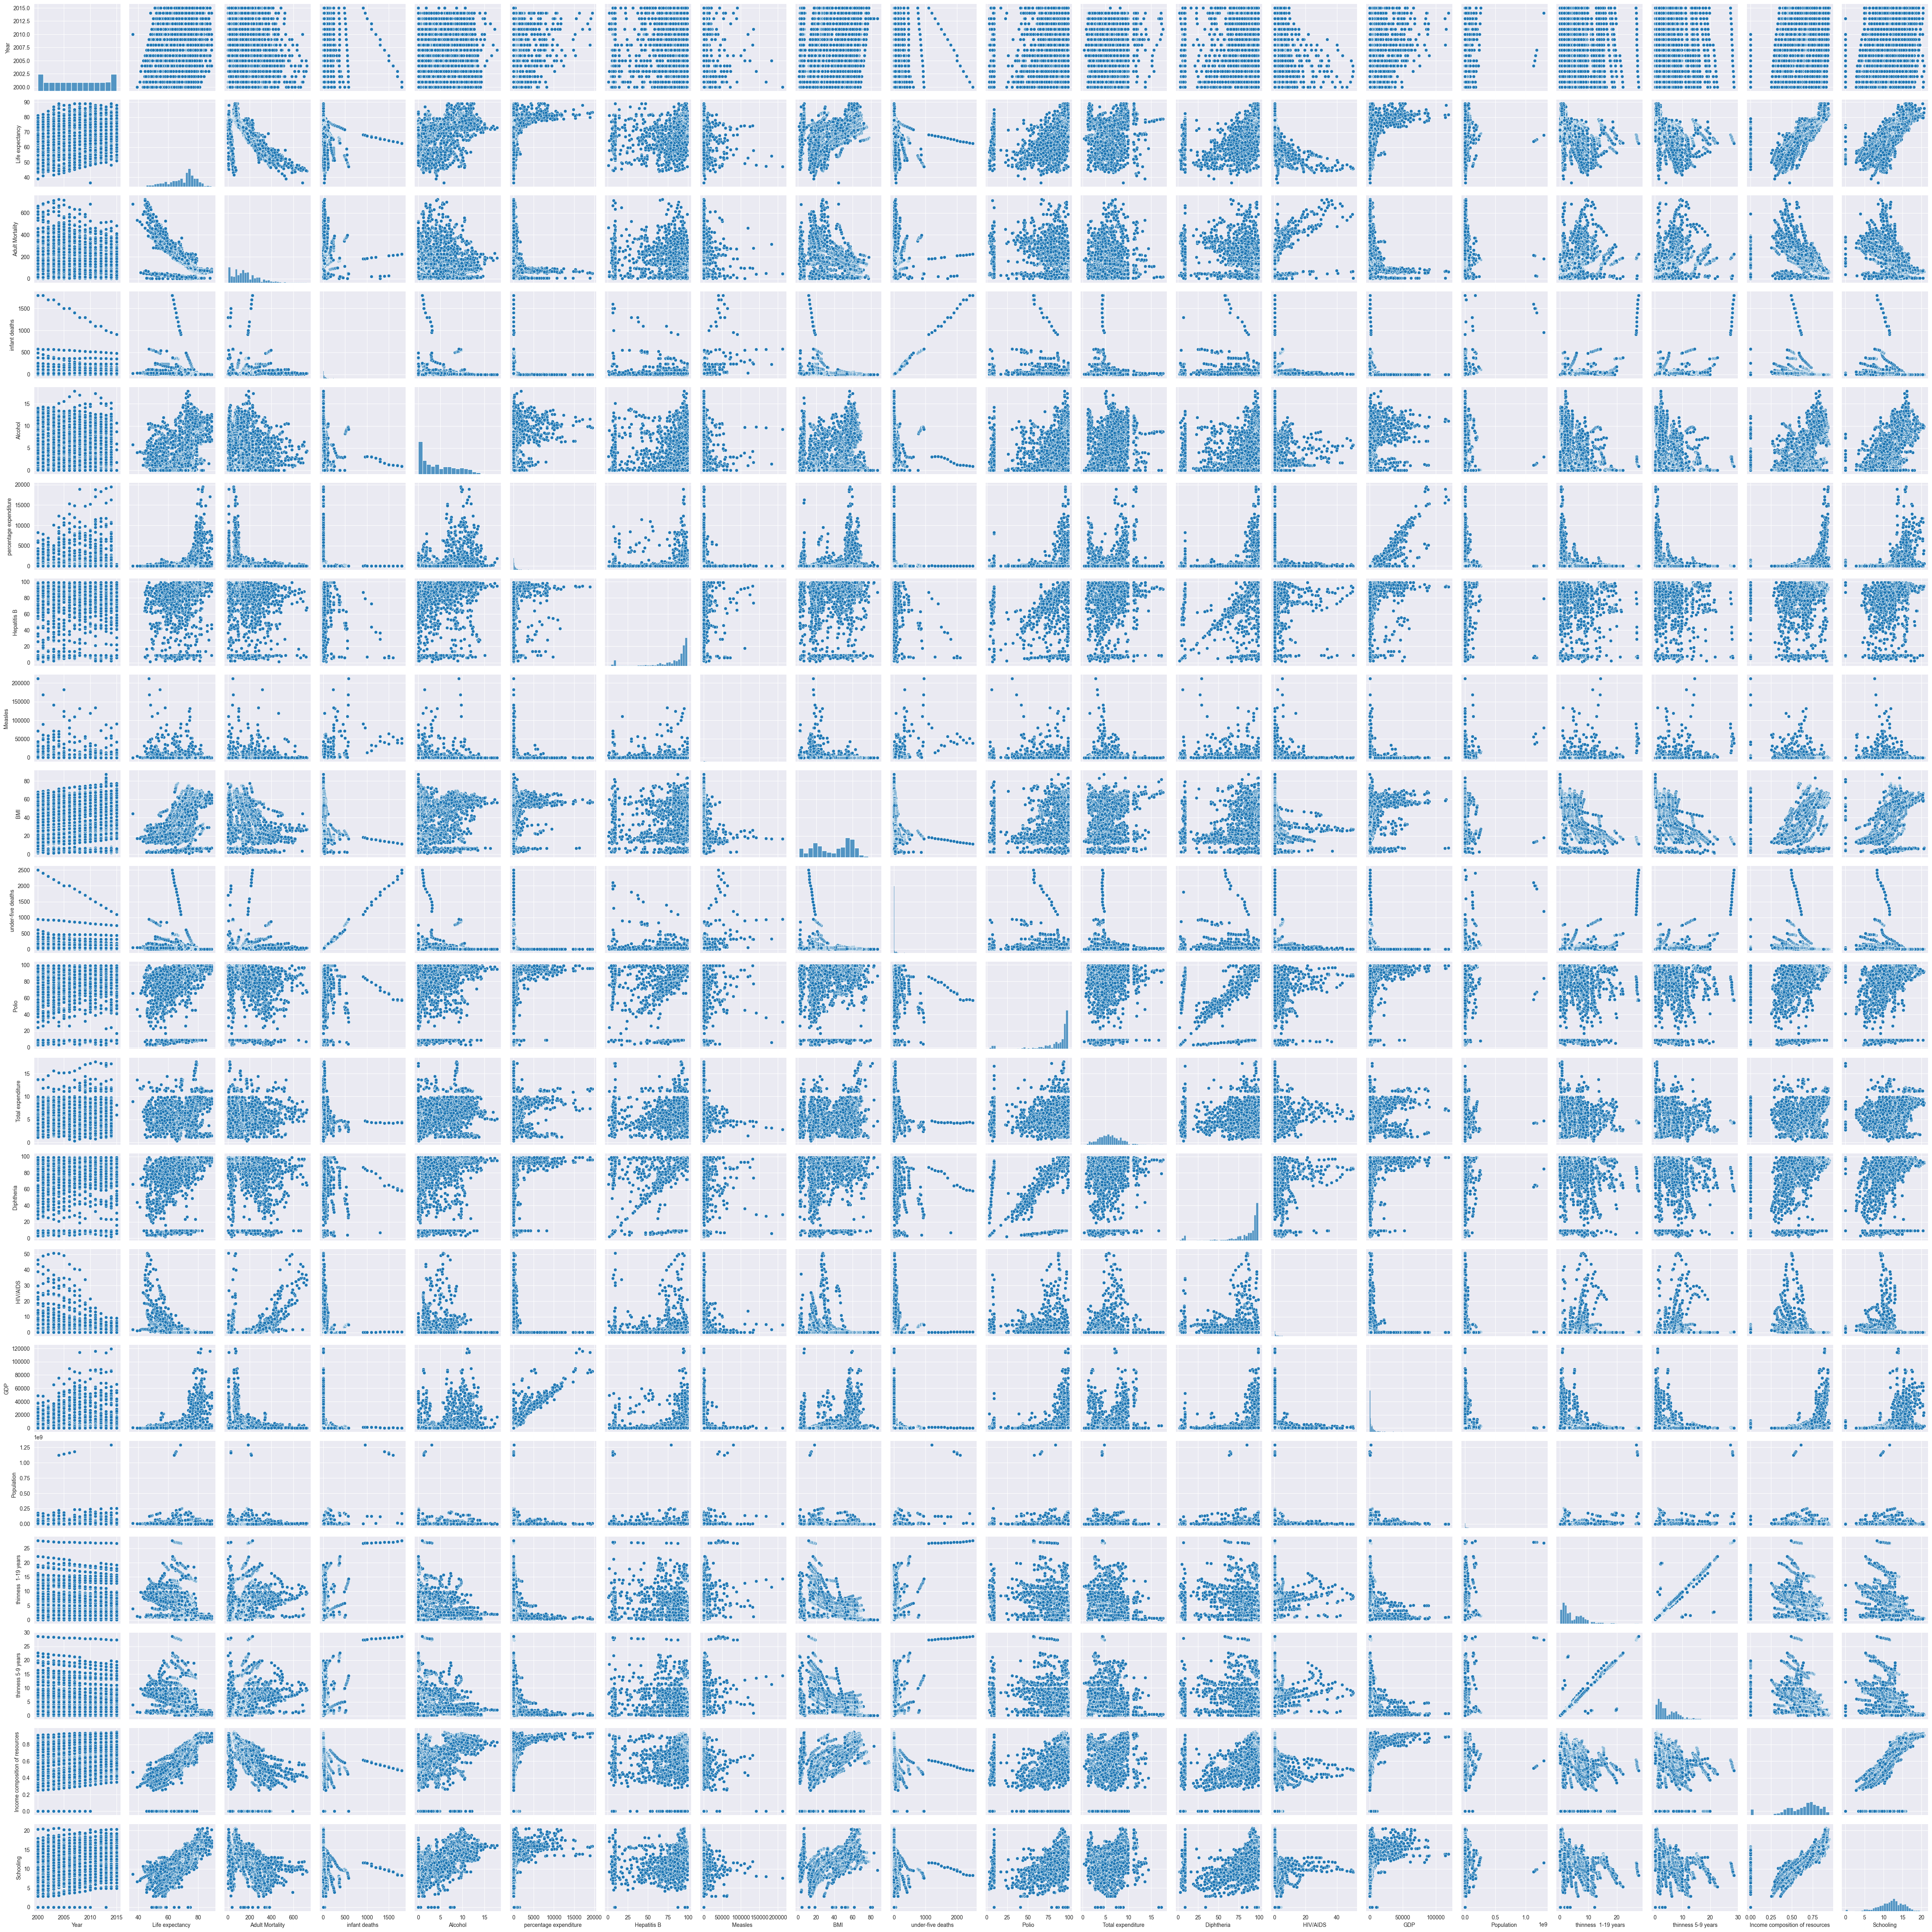

In [8]:
# Graficamos pairplot de las variables
sns.pairplot(lifeExpectancyDf)

In [9]:
# Graficamos un diagrama de dispersión entre "Composición de ingresos de los recursos" y "Esperanza de vida"
sns.scatterplot(x = 'Income composition of resources', y = 'Life expectancy ',hue = 'Status', data = lifeExpectancyDf)

C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Income composition of resources', ylabel='Life expectancy '>

C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Schooling', ylabel='Life expectancy '>

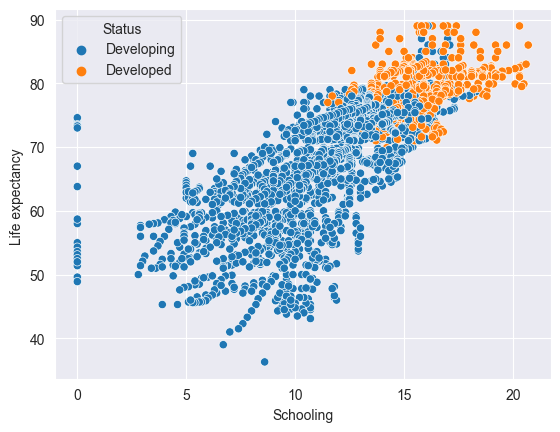

In [10]:
# Graficamos un diagrama de dispersión entre "Escolarización" y "Esperanza de vida"
sns.scatterplot(x = 'Schooling', y = 'Life expectancy ',hue = 'Status', data = lifeExpectancyDf)

In [11]:
# Graficamos una matriz de correlación
plt.figure(figsize=(20,10))
sns.heatmap(lifeExpectancyDf.corr(numeric_only = True), annot=True, cmap='coolwarm')

<Axes: >

In [12]:
# Verificamos los valores únicos de la variable status
lifeExpectancyDf['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [13]:
# Hacemos un one hot encoding de la variable status
lifeExpectancyDf = pd.get_dummies(lifeExpectancyDf, columns=['Status'])
lifeExpectancyDf

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015              65.0            263.0             62     0.01   
1     2014              59.9            271.0             64     0.01   
2     2013              59.9            268.0             66     0.01   
3     2012              59.5            272.0             69     0.01   
4     2011              59.2            275.0             71     0.01   
...    ...               ...              ...            ...      ...   
2933  2004              44.3            723.0             27     4.36   
2934  2003              44.5            715.0             26     4.06   
2935  2002              44.8             73.0             25     4.43   
2936  2001              45.3            686.0             25     1.72   
2937  2000              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   ...  Diphtheria    HIV/AIDS         GDP  Population  \
0                     83  ...         65.0        0.1  584.259210  33736494.0   
1                     86  ...         62.0        0.1  612.696514    327582.0   
2                     89  ...         64.0        0.1  631.744976  31731688.0   
3                     93  ...         67.0        0.1  669.959000   3696958.0   
4                     97  ...         68.0        0.1   63.537231   2978599.0   
...                  ...  ...          ...        ...         ...         ...   
2933                  42  ...         65.0       33.6  454.366654  12777511.0   
2934                  41  ...         68.0       36.7  453.351155  12633897.0   
2935                  40  ...         71.0       39.8   57.348340    125525.0   
2936                  39  ...         75.0       42.1  548.587312  12366165.0   
2937                  39  ...         78.0       43.5  547.358879  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  Status_Developed  \
0                               0.479       10.1             False   
1                               0.476       10.0             False   
2                               0.470        9.9             False   
3                               0.463        9.8             False   
4                               0.454        9.5             False   
...                               ...        ...               ...   
2933                            0.407        9.2             False   
2934                            0.418        9.5             False   
2935                            0.427       10.0             False   
2936                            0.427        9.8             False   
2937            

In [14]:
# Verificamos las columnas que solamente contienen valores nulos
lifeExpectancyDf.isnull().sum()[np.where(lifeExpectancyDf.isnull().sum() != 0)[0]]

C:\Users\ing_d\AppData\Local\Temp\ipykernel_20504\4210125890.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lifeExpectancyDf.isnull().sum()[np.where(lifeExpectancyDf.isnull().sum() != 0)[0]]


Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
# Hacemos ingenieria de caracteristicas para la variables
lifeExpectancyDf = lifeExpectancyDf.apply(lambda x: x.fillna(x.mean()),axis=0)

In [16]:
# Verificamos que ya no existan valores nulos
lifeExpectancyDf.isnull().sum()[np.where(lifeExpectancyDf.isnull().sum() != 0)[0]]

C:\Users\ing_d\AppData\Local\Temp\ipykernel_20504\2542517392.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lifeExpectancyDf.isnull().sum()[np.where(lifeExpectancyDf.isnull().sum() != 0)[0]]


Series([], dtype: int64)

# ENTRENAMIENTO DEL MODELO

In [17]:
# Creamos las variables X y Y
X = lifeExpectancyDf.drop(columns = ['Life expectancy '])
y = lifeExpectancyDf[['Life expectancy ']]

In [19]:
# Verificamos X
X

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004            723.0             27     4.36                0.000000   
2934  2003            715.0             26     4.06                0.000000   
2935  2002             73.0             25     4.43                0.000000   
2936  2001            686.0             25     1.72                0.000000   
2937  2000            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  \
0            65.0      1154   19.1                  83    6.0  ...   
1            62.0       492   18.6                  86   58.0  ...   
2            64.0       430   18.1                  89   62.0  ...   
3            67.0      2787   17.6                  93   67.0  ...   
4            68.0      3013   17.2                  97   68.0  ...   
...           ...       ...    ...                 ...    ...  ...   
2933         68.0        31   27.1                  42   67.0  ...   
2934          7.0       998   26.7                  41    7.0  ...   
2935         73.0       304   26.3                  40   73.0  ...   
2936         76.0       529   25.9                  39   76.0  ...   
2937         79.0      1483   25.5                  39   78.0  ...   

      Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0            65.0        0.1  584.259210  33736494.0                   17.2   
1            62.0        0.1  612.696514    327582.0                   17.5   
2            64.0        0.1  631.744976  31731688.0                   17.7   
3            67.0        0.1  669.959000   3696958.0                   17.9   
4            68.0        0.1   63.537231   2978599.0                   18.2   
...           ...        ...         ...         ...                    ...   
2933         65.0       33.6  454.366654  12777511.0                    9.4   
2934         68.0       36.7  453.351155  12633897.0                    9.8   
2935         71.0       39.8   57.348340    125525.0                    1.2   
2936         75.0       42.1  548.587312  12366165.0                    1.6   
2937         78.0       43.5  547.358879  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  \
0                    17.3                            0.479       10.1   
1                    17.5                            0.476       10.0   
2                    17.7                            0.470        9.9   
3                    18.0                            0.463        9.8   
4                    18.2                            0.454        9.5   
...                   ...                              ...        ...   
2933                  9.4                            0.407        9.2   
2934                  9.9                            0.418        9.5   
2935                  1.3                            0.427       10.0   
2936                  1.7                            0.427        9.8   
2937                 11.2                            0.434        9.8   

      Status_Developed  Status_Developing  
0                False               True  
1                False               True  
2                False               True  
3                False               True  
4                False               True  
...                ...                ...  
2933             False               True  
2934             False               T

In [22]:
# Verificamos y
y

Life expectancy 
0                 65.0
1                 59.9
2                 59.9
3                 59.5
4                 59.2
...                ...
2933              44.3
2934              44.5
2935              44.8
2936              45.3
2937              46.0

[2938 rows x 1 columns]

In [23]:
# Verificamos la forma de X
X.shape

(2938, 21)

In [24]:
# Verificamos la forma de y
y.shape

(2938, 1)

In [26]:
# Convertimos X y y en arreglos de numpy
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [27]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [29]:
# Entremanos el modelo
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
# Obtenemos el score del modelo
model_accuracy = model.score(X_test, y_test)
model_accuracy

0.95152298940619

In [31]:
# Hacems predicciones con el modelo
y_pred = model.predict(X_test)
y_pred

array([69.94037 , 67.187546, 76.36989 , 68.91676 , 75.221054, 78.37713 ,
       68.8885  , 74.01195 , 65.68844 , 67.54925 , 65.179276, 74.333145,
       74.839096, 75.689186, 59.242676, 81.393196, 74.66552 , 55.70219 ,
       67.23231 , 75.61544 , 73.37988 , 52.790733, 68.33137 , 79.01444 ,
       82.144516, 75.70986 , 66.51053 , 73.86266 , 75.547066, 69.18474 ,
       71.79341 , 58.55414 , 59.911034, 81.86691 , 65.62307 , 73.25821 ,
       68.586   , 74.179665, 78.855644, 72.0164  , 56.343586, 84.10595 ,
       74.29411 , 74.217636, 69.81749 , 74.29054 , 71.98736 , 51.90868 ,
       73.715866, 75.422356, 78.300385, 74.7104  , 69.91696 , 74.65253 ,
       67.862816, 69.12395 , 71.68818 , 56.473515, 68.61979 , 83.27077 ,
       72.04754 , 68.70146 , 61.214428, 73.75475 , 75.07652 , 55.58759 ,
       67.798454, 54.733612, 62.178318, 79.837845, 74.21061 , 78.704475,
       68.85344 , 60.913624, 51.686356, 71.83895 , 60.134037, 57.160236,
       63.244625, 74.04715 , 66.29388 , 47.69634 , 

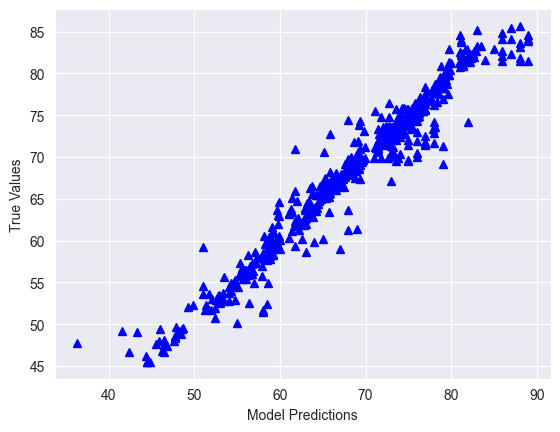

In [32]:
# Graficamos los valores reales vs los valores predichos
plt.plot(y_test, y_pred, "^", color = 'b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [33]:
# Obtenemos los KPIs del modelo
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 2.15 
MSE = 4.621874 
MAE = 1.3059887 
R2 = 0.95152298940619 
Adjusted R2 = 0.9497243724053596
